<a href="https://colab.research.google.com/github/Je3nFausi/AI-Coursework-2025/blob/main/Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


LOAD DATASET

In [ ]:
# Cell 2: Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving MobilePriceRange.csv to MobilePriceRange.csv


,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


DATA CLEANING

In [ ]:
# Cell 3: Data Cleaning
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
df = df.drop_duplicates()

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe()


Missing values:
 BatteryPower      0
InternalMemory    0
ClockSpeed        0
NoOfCores         0
RAM               0
TalkTime          0
DualSim           0
3G                0
4G                0
WiFi              0
Bluetooth         0
MobileDepth       0
MobileWeight      0
TouchScreen       0
ScreenHeight      0
ScreenWidth       0
FrontCameraPx     0
RearCameraPX      0
PxHeight          0
PxWeight          0
PriceRange        0
dtype: int64

Duplicates: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BatteryPower    2000 non-null   int64  
 1   InternalMemory  2000 non-null   int64  
 2   ClockSpeed      2000 non-null   float64
 3   NoOfCores       2000 non-null   int64  
 4   RAM             2000 non-null   int64  
 5   TalkTime        2000 non-null   int64  
 6   DualSim         2000 non-null   int64  
 7   3G 

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,Bluetooth,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,1.522250,4.520500,2124.213000,11.011000,0.509500,0.761500,0.521500,0.507000,0.4950,0.501750,140.249000,0.503000,12.306500,5.767000,4.309500,9.916500,645.108000,1251.515500
std,439.418206,18.145715,0.816004,2.287837,1084.732044,5.463955,0.500035,0.426273,0.499662,0.500076,0.5001,0.288416,35.399655,0.500116,4.213245,4.356398,4.341444,6.064315,443.780811,432.199447
min,501.000000,2.000000,0.500000,1.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.100000,80.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,500.000000
25%,851.750000,16.000000,0.700000,3.000000,1207.500000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.200000,109.000000,0.000000,9.000000,2.000000,1.000000,5.000000,282.750000,874.750000
50%,1226.000000,32.000000,1.500000,4.000000,2146.500000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0000,0.500000,141.000000,1.000000,12.000000,5.000000,3.000000,10.000000,564.000000,1247.000000
75%,1615.250000,48.000000,2.200000,7.000000,3064.500000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.800000,170.000000,1.000000,16.000000,9.000000,7.000000,15.000000,947.250000,1633.000000
max,1998.000000,64.000000,3.000000,8.000000,3998.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,200.000000,1.000000,19.000000,18.000000,19.000000,20.000000,1960.000000,1998.000000


EXPLORATORY DATA ANALYSIS

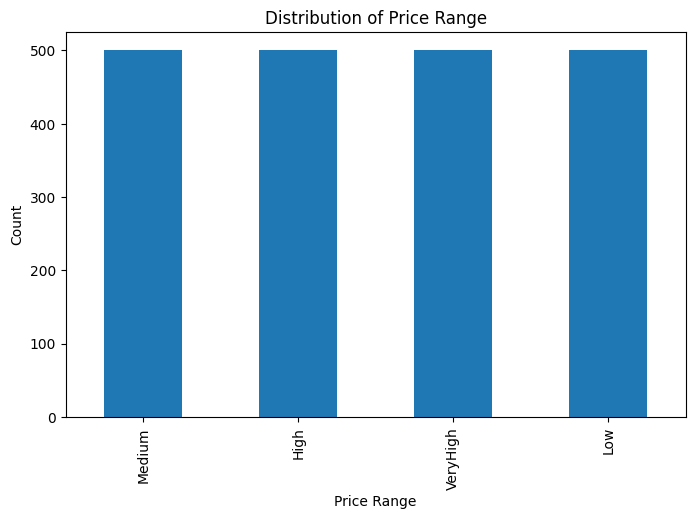

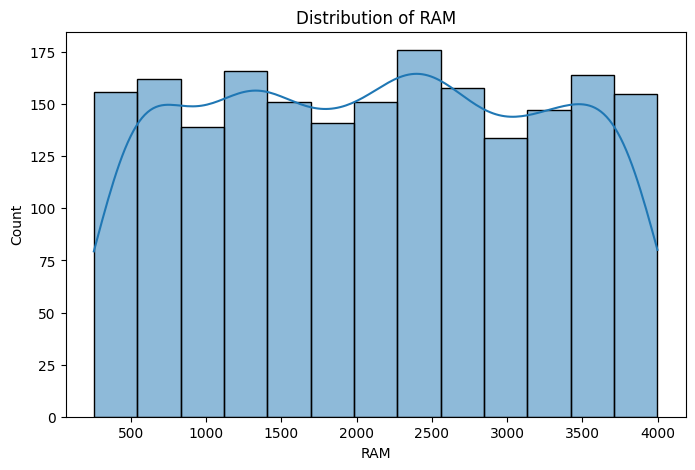

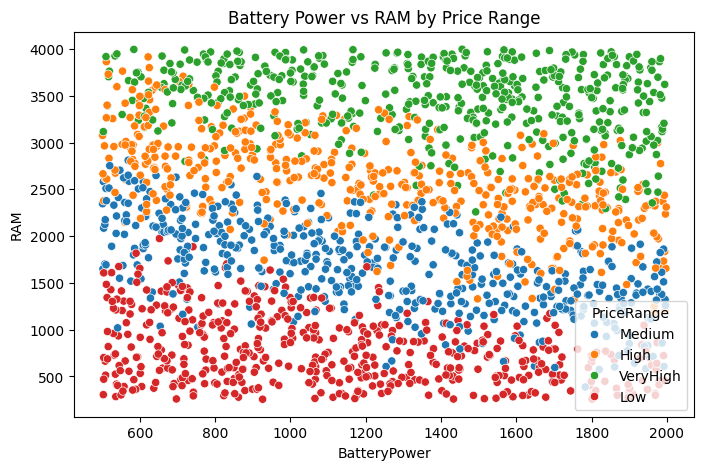

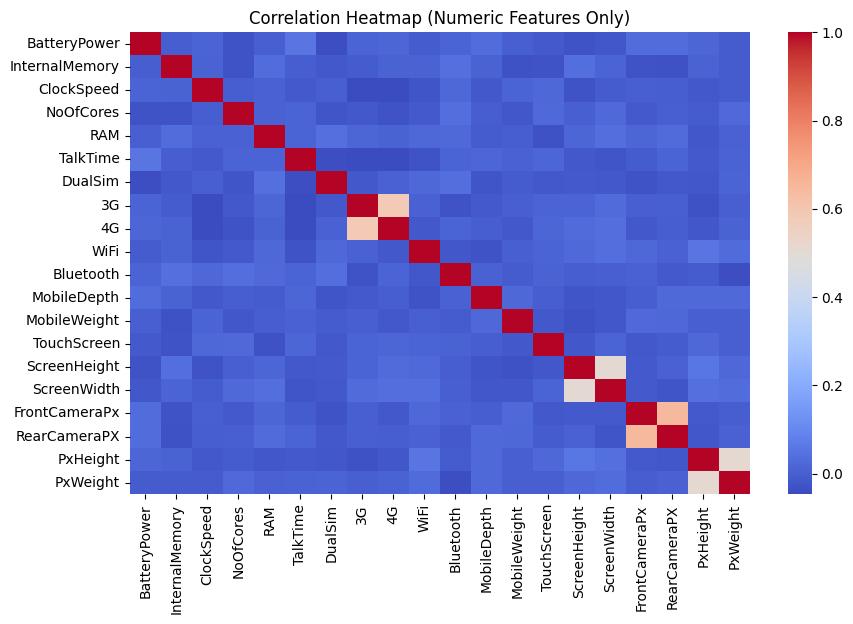

In [ ]:
# Cell 4: EDA

plt.figure(figsize=(8,5))
df['PriceRange'].value_counts().plot(kind='bar')
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['RAM'], kde=True)
plt.title("Distribution of RAM")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='BatteryPower', y='RAM', hue='PriceRange', data=df)
plt.title("Battery Power vs RAM by Price Range")
plt.show()

# FIXED HEATMAP (numeric columns only)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


FEATURE SELECTION

In [ ]:
# Cell 5: Select Features & Target Variable
X = df[['RAM', 'BatteryPower']]
y = df['PriceRange']


TRAIN-TEST SPLIT

In [ ]:
# Cell 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


FEATURE SCALING

In [ ]:
# Cell 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


FIND OPTIMAL K

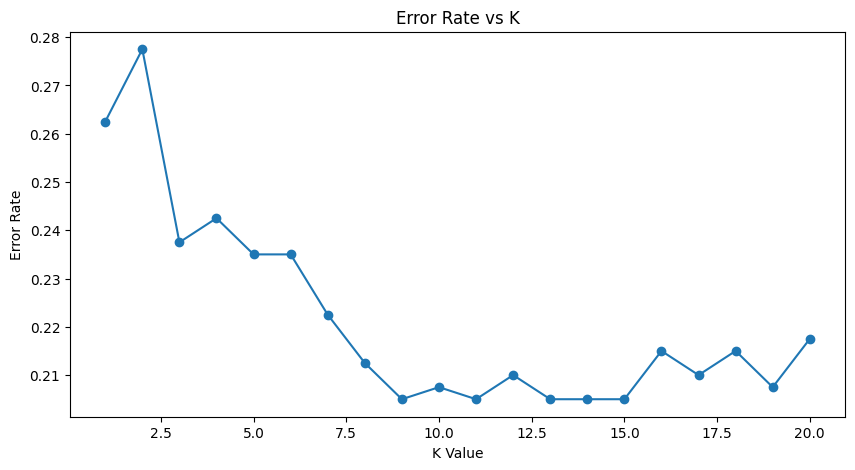

In [ ]:
# Cell 8: Find Best K
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    error_rates.append(np.mean(pred != y_test))

plt.figure(figsize=(10,5))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")
plt.show()


TRAIN FINAL kNN Model

In [ ]:
# Cell 9: Final kNN Model
best_k = 5   # choose from the graph
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


kNN Accuracy: 0.765

Confusion Matrix:
 [[65  0 13 14]
 [ 0 92 13  0]
 [15 11 65  0]
 [28  0  0 84]]

Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.71      0.65        92
         Low       0.89      0.88      0.88       105
      Medium       0.71      0.71      0.71        91
    VeryHigh       0.86      0.75      0.80       112

    accuracy                           0.77       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.78      0.77      0.77       400



DECISION TREE CLASSIFIER

In [ ]:
# Cell 10: Decision Tree (Eager Learner)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7475

Confusion Matrix:
 [[63  0 15 14]
 [ 0 90 15  0]
 [23 11 57  0]
 [23  0  0 89]]

Classification Report:
               precision    recall  f1-score   support

        High       0.58      0.68      0.63        92
         Low       0.89      0.86      0.87       105
      Medium       0.66      0.63      0.64        91
    VeryHigh       0.86      0.79      0.83       112

    accuracy                           0.75       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.76      0.75      0.75       400



HYPERPARAMETER TUNING

In [ ]:
# Cell 11: Hyperparameter Tuning for Decision Tree

param_grid = {
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best Parameters Found:", grid.best_params_)


Best Parameters Found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


FINAL TUNED DECISION TREE

In [ ]:
# Cell 12: Tuned Decision Tree
best_dt = grid.best_estimator_
y_pred_tuned = best_dt.predict(X_test)

print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Decision Tree Accuracy: 0.79

Confusion Matrix:
 [[69  0 14  9]
 [ 0 95 10  0]
 [15  7 69  0]
 [29  0  0 83]]

Classification Report:
               precision    recall  f1-score   support

        High       0.61      0.75      0.67        92
         Low       0.93      0.90      0.92       105
      Medium       0.74      0.76      0.75        91
    VeryHigh       0.90      0.74      0.81       112

    accuracy                           0.79       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.79      0.79       400



COMPARE ALL THREE MODELS

In [ ]:
# Cell 13: Model Comparison

print("MODEL ACCURACIES")
print("-----------------------")
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tuned))


MODEL ACCURACIES
-----------------------
kNN Accuracy: 0.765
Decision Tree Accuracy: 0.7475
Tuned Decision Tree Accuracy: 0.79
